# Visualization for multi samples tests on all slices

In [8]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from matplotlib.colors import ListedColormap

In [9]:
colors = ['#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7']
color_map = ListedColormap(colors)
def visualization(ax, df, ari, name):
    ax.scatter(df['x'], df['y'], c=df['cluster'], cmap=color_map, s=60)
    ax.set_title(name + ' (ARI={0:.2f})'.format(ari), fontsize=30)

def visualization_true(ax, df):
    label_names = df['label'].unique()
    for i, label in enumerate(label_names):
        data = df[df['label'] == label]
        ax.scatter(data['x'], data['y'], c=colors[i], label=label, s=60)
        ax.set_title("Manual Annotation", fontsize=30)
        ax.legend()

In [10]:
# Parse all results
samples = ("slice1", "slice2", "slice3", "slice4")
methods = ("BASS", "BayesSpace", "GraphST", "iSC_MEB", "MAPLE", "Seurat", "SpaGCN", "STAGATE", "Stardust", "stLearn")

dfs_true = {}
for sample_id in samples:
    # Get the true labels(Manual Annotation) first
    layers = pd.read_csv("../../data/simulation/Bar_nobatch/" + sample_id + "/layer" + sample_id[-1] + ".csv", index_col=0, header=0)
    position = pd.read_csv("../../data/simulation/Bar_nobatch/" + sample_id + "/position" + sample_id[-1] + ".csv", index_col=0, header=0)
    layers['label'] = layers['cluster']
    df_true = pd.concat([layers, position], axis=1)
    dfs_true[sample_id] = df_true[['label', 'x', 'y']]

dfs = {}
for method in methods:
    # Get the result table
    df_test = pd.read_csv(os.path.join("../../results/simulation2", method, method + '_multi1234.csv'), index_col=None, header=0)
    df_test.index.name = None
    df_test.index = df_test['spot_name'].str.split("_").str[0]

    dfs[method] = {}
    for sample_id in samples:
        df_test_sample = df_test[(df_test['sample'].astype('str') == sample_id) | (df_test['sample'].astype('str').str[-1] == sample_id[-1])]
        df = df_test_sample.join(dfs_true[sample_id], how='inner')
        # Calculate ARI score
        ari = adjusted_rand_score(df['label'], df['cluster'])
        dfs[method][sample_id] = {'df': df[['x', 'y', 'cluster']], 'ari': ari}

## Visualizations

### slice1

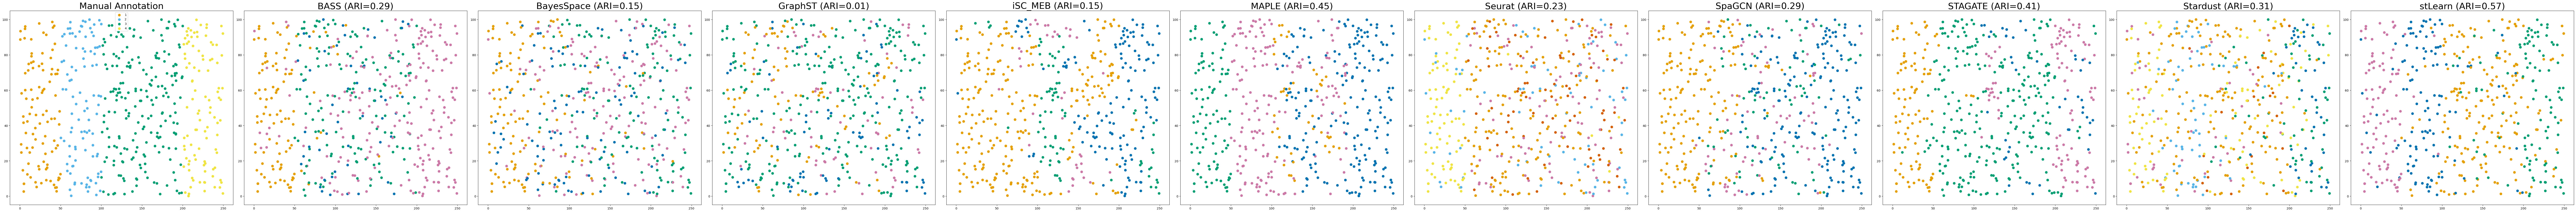

In [11]:
sample_id = 'slice1'
_, axs = plt.subplots(1, 11, figsize=(120, 10))
visualization_true(axs[0], dfs_true[sample_id])
for ax, method in zip(axs[1:], methods):
    result = dfs[method][sample_id]
    visualization(ax, result['df'], result['ari'], method)
plt.tight_layout()

### slice2

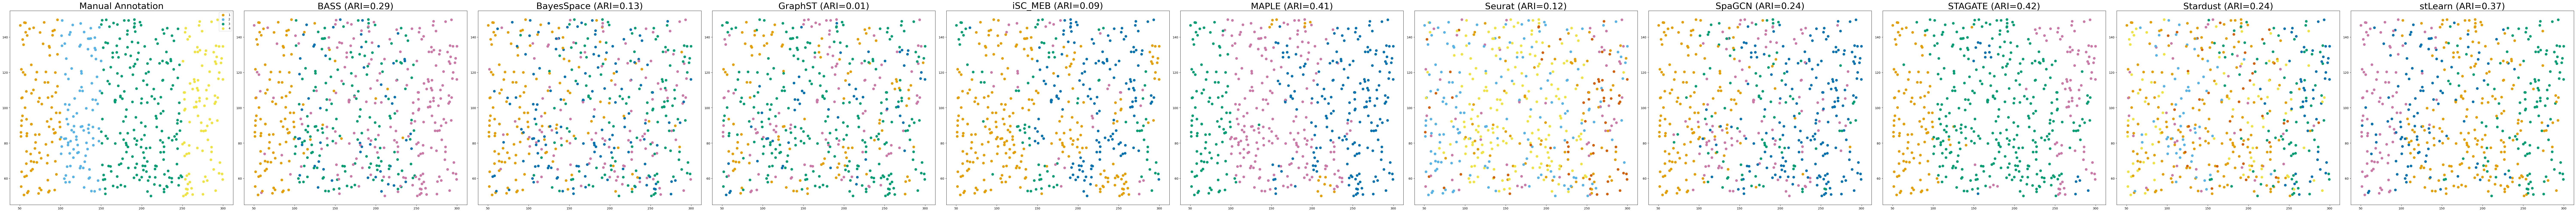

In [12]:
sample_id = 'slice2'
_, axs = plt.subplots(1, 11, figsize=(120, 10))
visualization_true(axs[0], dfs_true[sample_id])
for ax, method in zip(axs[1:], methods):
    result = dfs[method][sample_id]
    visualization(ax, result['df'], result['ari'], method)
plt.tight_layout()

### slice3

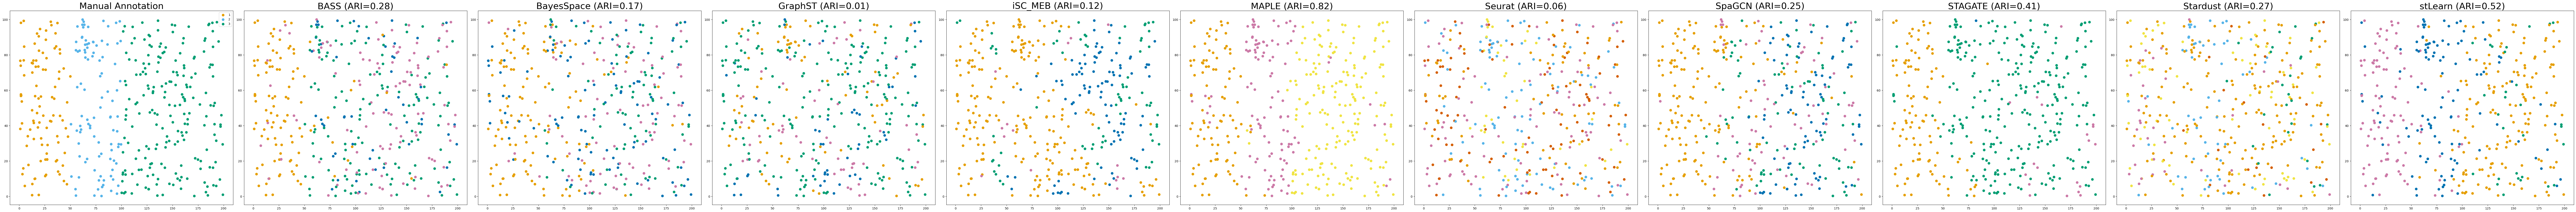

In [13]:
sample_id = 'slice3'
_, axs = plt.subplots(1, 11, figsize=(120, 10))
visualization_true(axs[0], dfs_true[sample_id])
for ax, method in zip(axs[1:], methods):
    result = dfs[method][sample_id]
    visualization(ax, result['df'], result['ari'], method)
plt.tight_layout()

### slice4

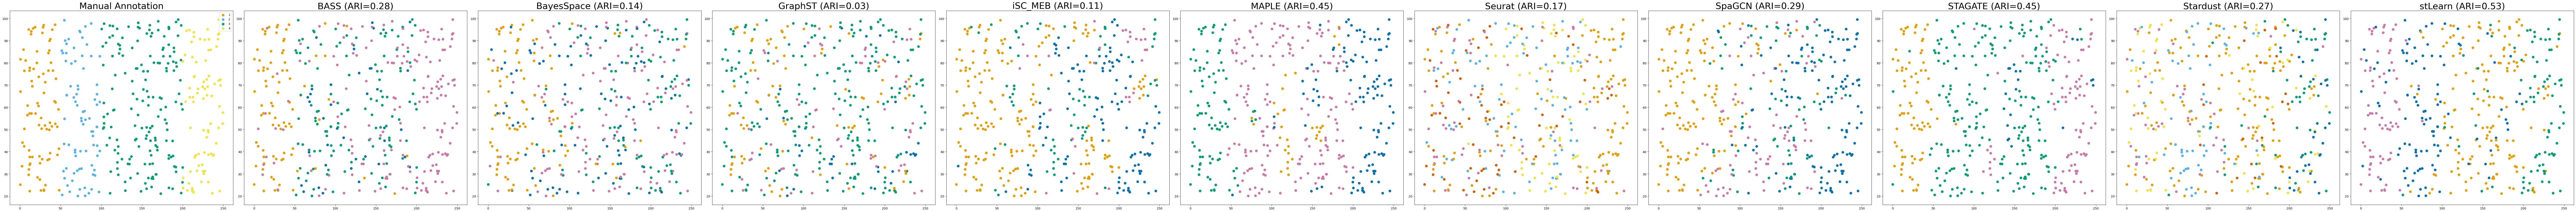

In [14]:
sample_id = 'slice4'
_, axs = plt.subplots(1, 11, figsize=(120, 10))
visualization_true(axs[0], dfs_true[sample_id])
for ax, method in zip(axs[1:], methods):
    result = dfs[method][sample_id]
    visualization(ax, result['df'], result['ari'], method)
plt.tight_layout()